In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('C:/Users/USER/Desktop/Project/Analysis and Prediction of Earthquake/Dataset/train.csv')
test=pd.read_csv('C:/Users/USER/Desktop/Project/Analysis and Prediction of Earthquake/Dataset/test.csv')

In [3]:
train.shape,test.shape

((631761, 14), (421175, 13))

In [4]:
train.head()

,area_assesed,building_id,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,0,0,0.0,2489
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,0,0,1.0,4423
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,0,0,0.0,3650
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,0,0,0.0,3016
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,0,0,0.0,3627


In [5]:
test.head()

,area_assesed,building_id,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,a3380c4f75,7,0,0,0,0,0,0,0,0,1.0,701
1,Both,a338a4e653,7,0,0,0,0,0,0,0,0,1.0,701
2,Building removed,a338a4e6b7,7,0,0,0,0,0,0,0,0,1.0,701
3,Both,a33a6eaa3a,7,0,0,0,0,0,0,0,0,1.0,701
4,Building removed,a33b073ff6,7,0,0,0,0,0,0,0,0,1.0,701


In [6]:
train.columns,test.columns

(Index(['area_assesed', 'building_id', 'damage_grade', 'district_id',
        'has_geotechnical_risk', 'has_geotechnical_risk_fault_crack',
        'has_geotechnical_risk_flood', 'has_geotechnical_risk_land_settlement',
        'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
        'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
        'has_repair_started', 'vdcmun_id'],
       dtype='object'),
 Index(['area_assesed', 'building_id', 'district_id', 'has_geotechnical_risk',
        'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_flood',
        'has_geotechnical_risk_land_settlement',
        'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction',
        'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall',
        'has_repair_started', 'vdcmun_id'],
       dtype='object'))

In [7]:
len(train.columns),len(test.columns)

(14, 13)

In [8]:
train.isnull().sum()

area_assesed                                 0
building_id                                  0
damage_grade                                 0
district_id                                  0
has_geotechnical_risk                        0
has_geotechnical_risk_fault_crack            0
has_geotechnical_risk_flood                  0
has_geotechnical_risk_land_settlement        0
has_geotechnical_risk_landslide              0
has_geotechnical_risk_liquefaction           0
has_geotechnical_risk_other                  0
has_geotechnical_risk_rock_fall              0
has_repair_started                       33417
vdcmun_id                                    0
dtype: int64

In [9]:
test.isnull().sum()

area_assesed                                 0
building_id                                  0
district_id                                  0
has_geotechnical_risk                        0
has_geotechnical_risk_fault_crack            0
has_geotechnical_risk_flood                  0
has_geotechnical_risk_land_settlement        0
has_geotechnical_risk_landslide              0
has_geotechnical_risk_liquefaction           0
has_geotechnical_risk_other                  0
has_geotechnical_risk_rock_fall              0
has_repair_started                       21922
vdcmun_id                                    0
dtype: int64

In [10]:
owner = pd.read_csv('C:/Users/USER/Desktop/Project/Analysis and Prediction of Earthquake/Dataset/Building_Ownership_Use.csv')
structure = pd.read_csv('C:/Users/USER/Desktop/Project/Analysis and Prediction of Earthquake/Dataset/Building_Structure.csv')

In [11]:
combine = pd.merge(owner,structure, on='building_id')
trainfinal = pd.merge(combine,train, on = 'building_id')
testfinal = pd.merge(combine,test, on = 'building_id')

In [12]:
trainfinal.columns,testfinal.columns,len(trainfinal.columns),len(testfinal.columns)

(Index(['building_id', 'district_id_x', 'vdcmun_id_x', 'ward_id_x',
        'legal_ownership_status', 'count_families', 'has_secondary_use',
        'has_secondary_use_agriculture', 'has_secondary_use_hotel',
        'has_secondary_use_rental', 'has_secondary_use_institution',
        'has_secondary_use_school', 'has_secondary_use_industry',
        'has_secondary_use_health_post', 'has_secondary_use_gov_office',
        'has_secondary_use_use_police', 'has_secondary_use_other',
        'district_id_y', 'vdcmun_id_y', 'ward_id_y', 'count_floors_pre_eq',
        'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft',
        'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition',
        'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
        'position', 'plan_configuration', 'has_superstructure_adobe_mud',
        'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
        'has_superstructure_cement_mortar_stone',
        'ha

In [13]:
trainfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 58 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   building_id                             631761 non-null  object 
 1   district_id_x                           631761 non-null  int64  
 2   vdcmun_id_x                             631761 non-null  int64  
 3   ward_id_x                               631761 non-null  int64  
 4   legal_ownership_status                  631761 non-null  object 
 5   count_families                          631760 non-null  float64
 6   has_secondary_use                       631761 non-null  float64
 7   has_secondary_use_agriculture           631761 non-null  int64  
 8   has_secondary_use_hotel                 631761 non-null  int64  
 9   has_secondary_use_rental                631761 non-null  int64  
 10  has_secondary_use_institution           6317

In [14]:
testfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419863 entries, 0 to 419862
Data columns (total 57 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   building_id                             419863 non-null  object 
 1   district_id_x                           419863 non-null  int64  
 2   vdcmun_id_x                             419863 non-null  int64  
 3   ward_id_x                               419863 non-null  int64  
 4   legal_ownership_status                  419863 non-null  object 
 5   count_families                          419863 non-null  float64
 6   has_secondary_use                       419863 non-null  float64
 7   has_secondary_use_agriculture           419863 non-null  int64  
 8   has_secondary_use_hotel                 419863 non-null  int64  
 9   has_secondary_use_rental                419863 non-null  int64  
 10  has_secondary_use_institution           4198

In [15]:
trainfinal.isnull().sum()

building_id                                   0
district_id_x                                 0
vdcmun_id_x                                   0
ward_id_x                                     0
legal_ownership_status                        0
count_families                                1
has_secondary_use                             0
has_secondary_use_agriculture                 0
has_secondary_use_hotel                       0
has_secondary_use_rental                      0
has_secondary_use_institution                 0
has_secondary_use_school                      0
has_secondary_use_industry                    0
has_secondary_use_health_post                 0
has_secondary_use_gov_office                  0
has_secondary_use_use_police                  0
has_secondary_use_other                       0
district_id_y                                 0
vdcmun_id_y                                   0
ward_id_y                                     0
count_floors_pre_eq                     

In [16]:
testfinal.isnull().sum()

building_id                                   0
district_id_x                                 0
vdcmun_id_x                                   0
ward_id_x                                     0
legal_ownership_status                        0
count_families                                0
has_secondary_use                             0
has_secondary_use_agriculture                 0
has_secondary_use_hotel                       0
has_secondary_use_rental                      0
has_secondary_use_institution                 0
has_secondary_use_school                      0
has_secondary_use_industry                    0
has_secondary_use_health_post                 0
has_secondary_use_gov_office                  0
has_secondary_use_use_police                  0
has_secondary_use_other                       0
district_id_y                                 0
vdcmun_id_y                                   0
ward_id_y                                     0
count_floors_pre_eq                     

In [17]:
trainfinal.drop('has_repair_started',axis=1,inplace=True)
testfinal.drop('has_repair_started',axis=1,inplace=True)

In [18]:
trainfinal.drop((['vdcmun_id_y','district_id_y','ward_id_y','vdcmun_id','district_id']) , axis = 1,inplace=True)
testfinal.drop((['vdcmun_id_y','district_id_y','ward_id_y','vdcmun_id','district_id']) , axis = 1,inplace=True)

In [19]:
features = list(trainfinal.columns)
features2=list(testfinal.columns)

In [20]:
trainfinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 52 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   building_id                             631761 non-null  object 
 1   district_id_x                           631761 non-null  int64  
 2   vdcmun_id_x                             631761 non-null  int64  
 3   ward_id_x                               631761 non-null  int64  
 4   legal_ownership_status                  631761 non-null  object 
 5   count_families                          631760 non-null  float64
 6   has_secondary_use                       631761 non-null  float64
 7   has_secondary_use_agriculture           631761 non-null  int64  
 8   has_secondary_use_hotel                 631761 non-null  int64  
 9   has_secondary_use_rental                631761 non-null  int64  
 10  has_secondary_use_institution           6317

Grade 5    210825
Grade 4    152244
Grade 3    122288
Grade 2     85084
Grade 1     61320
Name: damage_grade, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Grade 5'),
  Text(1, 0, 'Grade 4'),
  Text(2, 0, 'Grade 3'),
  Text(3, 0, 'Grade 2'),
  Text(4, 0, 'Grade 1')])

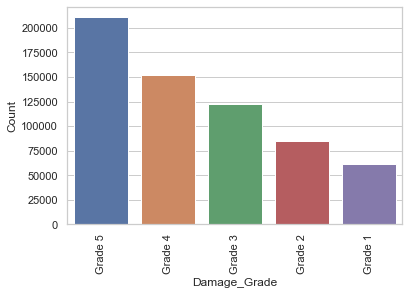

In [21]:
target = trainfinal['damage_grade'].value_counts()
print(target)
target = target.to_frame()
target.columns = ['Count']
target.index.names = ['Damage_Grade']
target['Damage_Grade'] = target.index 

#Plotting the Target variable
sns.set(style = 'whitegrid', color_codes = True)
sns.barplot(x = 'Damage_Grade', y = 'Count', data = target)
plt.xticks(rotation = 90)

Private          608347
Public            13453
Institutional      6280
Other              3681
Name: legal_ownership_status, dtype: int64


<AxesSubplot:>

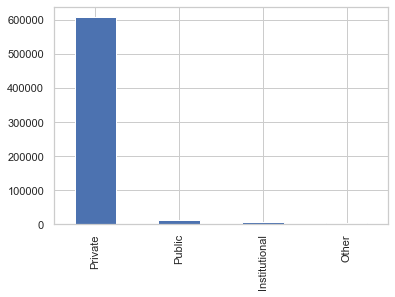

In [22]:
print(trainfinal['legal_ownership_status'].value_counts())
trainfinal['legal_ownership_status'].value_counts().plot.bar()

0         32
1         34
2         20
3         44
4         25
          ..
631756    13
631757    35
631758    35
631759    19
631760    12
Name: age_building, Length: 631761, dtype: int64


<AxesSubplot:xlabel='age_building', ylabel='Density'>

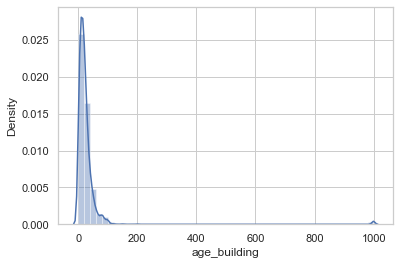

In [23]:
print(trainfinal['age_building'])
sns.distplot(trainfinal['age_building'])

['Damaged-Repaired and used' 'Damaged-Not used' 'Damaged-Rubble clear'
 'Damaged-Rubble Clear-New building built' 'Damaged-Used in risk'
 'Damaged-Rubble unclear' 'Not damaged' 'Covered by landslide']


<AxesSubplot:>

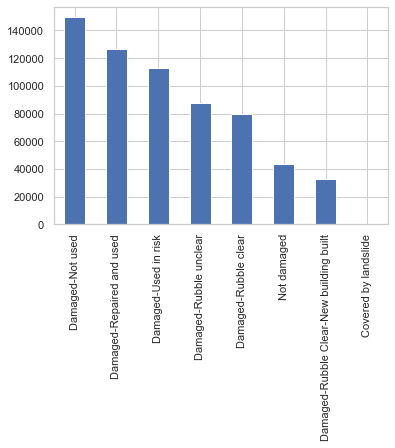

In [24]:
print(trainfinal['condition_post_eq'].unique())
trainfinal['condition_post_eq'].value_counts().plot.bar()

18    81243
14    80882
16    64473
12    63038
15    44843
      ...  
89        1
90        1
93        1
95        1
77        1
Name: height_ft_pre_eq, Length: 78, dtype: int64


<AxesSubplot:ylabel='Frequency'>

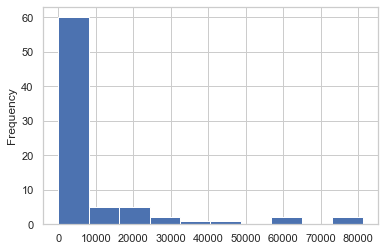

In [25]:
print(trainfinal['height_ft_pre_eq'].value_counts())
trainfinal['height_ft_pre_eq'].value_counts().plot.hist()

0                     Both
1                     Both
2                     Both
3                     Both
4                     Both
                ...       
631756                Both
631757    Building removed
631758    Building removed
631759    Building removed
631760    Building removed
Name: area_assesed, Length: 631761, dtype: object


<AxesSubplot:xlabel='area_assesed', ylabel='count'>

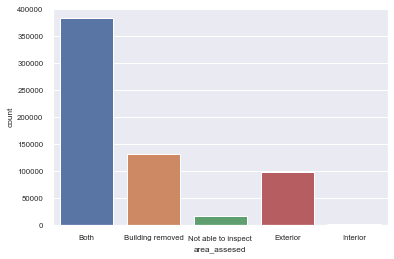

In [26]:
sns.set(font_scale=0.7)
print(trainfinal['area_assesed'])
sns.countplot(trainfinal['area_assesed'])

In [27]:
conversion = {'damage_grade' : {"Grade 1" : 1, "Grade 2" : 2, "Grade 3" : 3,"Grade 4" : 4,"Grade 5" : 5}}
train_temp = pd.DataFrame()
train_temp['damage_grade'] = trainfinal['damage_grade']

train_temp.replace(conversion, inplace = True)
print(train_temp['damage_grade'].head())

trainfinal['damage_grade'] = train_temp['damage_grade']
trainfinal['damage_grade'].head()

0    2
1    3
2    3
3    4
4    3
Name: damage_grade, dtype: int64


0    2
1    3
2    3
3    4
4    3
Name: damage_grade, dtype: int64

In [28]:
cat = [c for c in trainfinal if trainfinal[c].dtypes == "object"]
cat.remove('building_id')
print(cat)

['legal_ownership_status', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'condition_post_eq', 'area_assesed']


In [29]:
def ChiSquareTest(cat,res_train):
  
  for c in cat:
    print(c)
    tab = pd.crosstab(res_train['damage_grade'], res_train[c])
    stat, p, dof, expected = chi2_contingency(tab)
    print('dof=%d' % dof)
    #print(expected)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
      print('Dependent (reject H0)')
    else:
      print('Independent (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
      print('Dependent (reject H0)')
    else:
      print('Independent (fail to reject H0)')
     
    print(" ")

In [30]:
ChiSquareTest(cat,trainfinal)

legal_ownership_status
dof=12
probability=0.950, critical=21.026, stat=8113.932
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
land_surface_condition
dof=8
probability=0.950, critical=15.507, stat=1408.392
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
foundation_type
dof=16
probability=0.950, critical=26.296, stat=138103.743
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
roof_type
dof=8
probability=0.950, critical=15.507, stat=85099.545
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
ground_floor_type
dof=16
probability=0.950, critical=26.296, stat=107177.045
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
other_floor_type
dof=12
probability=0.950, critical=21.026, stat=93978.074
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
position
dof=12
probability=0.950, critical=21.026, stat=5026.896
Dependent (reject H0)
significance=0.

In [31]:
cat_binary = [c for c in trainfinal if len(trainfinal[c].unique()) == 2]
cat_binary

['has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other',
 'has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'has_geotechnical_risk',
 'has_geotechnical_risk_fault_crack',
 'has_geotechnical_risk_flood',
 'has_geotechnical_risk_land_settlement',
 'has_geotechnical_risk_landslide',
 'has_geotechnical_risk_liquefaction',
 'has_geotechnical_risk_other',
 'has_geotechnical_r

In [32]:

def cramers_v(x, y):
  correlation_coeff = []
  for c in cat_binary:
    confusion_matrix = pd.crosstab(trainfinal[c],y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    
    correlation_coeff.append([c,np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))])
    
  return correlation_coeff

In [33]:
cramers_v(cat_binary, trainfinal['damage_grade'])

[['has_secondary_use', 0.08441248217165927],
 ['has_secondary_use_agriculture', 0.05948222661881513],
 ['has_secondary_use_hotel', 0.11931727185148487],
 ['has_secondary_use_rental', 0.10798851155159755],
 ['has_secondary_use_institution', 0.04000696439985445],
 ['has_secondary_use_school', 0.02115838376096302],
 ['has_secondary_use_industry', 0.012146442641532596],
 ['has_secondary_use_health_post', 0.009057079201118534],
 ['has_secondary_use_gov_office', 0.010428605108001273],
 ['has_secondary_use_use_police', 0.001672082018154515],
 ['has_secondary_use_other', 0.024000617699672995],
 ['has_superstructure_adobe_mud', 0.10906485273848247],
 ['has_superstructure_mud_mortar_stone', 0.3516007808920147],
 ['has_superstructure_stone_flag', 0.06369988742717195],
 ['has_superstructure_cement_mortar_stone', 0.07605311792908845],
 ['has_superstructure_mud_mortar_brick', 0.09329851436407582],
 ['has_superstructure_cement_mortar_brick', 0.31581765697361813],
 ['has_superstructure_timber', 0.0821

In [34]:
ChiSquareTest(cat_binary,trainfinal)

has_secondary_use
dof=4
probability=0.950, critical=9.488, stat=4505.585
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_secondary_use_agriculture
dof=4
probability=0.950, critical=9.488, stat=2239.252
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_secondary_use_hotel
dof=4
probability=0.950, critical=9.488, stat=8998.122
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_secondary_use_rental
dof=4
probability=0.950, critical=9.488, stat=7371.281
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_secondary_use_institution
dof=4
probability=0.950, critical=9.488, stat=1015.168
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_secondary_use_school
dof=4
probability=0.950, critical=9.488, stat=286.825
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)
 
has_secondary_use_industry
dof=4
probability=0.950, critical=9.488, stat=97

In [35]:
trainfinal.drop(['has_secondary_use_use_police','building_id'], axis = 1,inplace=True)
testfinal.drop(['has_secondary_use_use_police','building_id'], axis = 1,inplace=True)

In [36]:
cont = [c for c in trainfinal if len(trainfinal[c].unique()) > 15]
indices = 0,1,2,3
cont = [i for j, i in enumerate(cont) if j not in indices]

In [37]:
train_copy = trainfinal
test_copy = testfinal

In [38]:
train_copy['IsPrivate'] = (train_copy["legal_ownership_status"] == "Private") * 1 
test_copy['IsPrivate'] = (test_copy["legal_ownership_status"] == "Private") * 1

In [39]:
train_copy['IsFlat'] = (train_copy["land_surface_condition"] == "Flat") * 1
test_copy['IsFlat'] = (test_copy["land_surface_condition"] == "Flat") * 1
train_copy['IsMudFoundation'] = (train_copy["foundation_type"] == "Mud mortar-Stone/Brick") * 1
test_copy['IsMudFoundation'] = (test_copy["foundation_type"] == "Mud mortar-Stone/Brick") * 1
train_copy['IsBambooRoofLight'] = (train_copy["roof_type"] == "Bamboo/Timber-Light roof") * 1
test_copy['IsBambooRoofLight'] = (test_copy["roof_type"] == "Bamboo/Timber-Light roof") * 1
train_copy['IsFloorTypeMud'] = (train_copy["ground_floor_type"] == "Mud") * 1
test_copy['IsFloorTypeMud'] = (test_copy["ground_floor_type"] == "Mud") * 1
train_copy['OtherFloorTypeMud'] = (train_copy["other_floor_type"] == "TImber/Bamboo-Mud") * 1
test_copy['OtherFloorTypeMud'] = (test_copy["other_floor_type"] == "TImber/Bamboo-Mud") * 1
train_copy['IsNotAttached'] = (train_copy["position"] == "Not attached") * 1
test_copy['IsNotAttached'] = (test_copy["position"] == "Not attached") * 1
train_copy['IsPlanConfigRectangular'] = (train_copy["plan_configuration"] == "Rectangular") * 1
test_copy['IsPlanConfigRectangular'] = (test_copy["plan_configuration"] == "Rectangular") * 1
train_copy['count_floors_change'] = (train_copy['count_floors_post_eq'] - train_copy['count_floors_pre_eq'])
train_copy['height_ft_change'] = (train_copy['height_ft_post_eq'] - train_copy['height_ft_pre_eq'])
test_copy['count_floors_change'] = (test_copy['count_floors_post_eq'] - test_copy['count_floors_pre_eq'])
test_copy['height_ft_change'] = (test_copy['height_ft_post_eq'] - test_copy['height_ft_pre_eq'])

In [40]:
train_copy.drop(['count_floors_pre_eq', 'height_ft_pre_eq'], axis=1, inplace=True)
test_copy.drop(['count_floors_pre_eq', 'height_ft_pre_eq'], axis=1, inplace=True)

In [41]:
remove_columns = ["legal_ownership_status","land_surface_condition","foundation_type","roof_type","ground_floor_type","other_floor_type","position","plan_configuration","count_floors_post_eq","height_ft_post_eq"]
def dropColumns(res_train_copy,res_test_copy,remove_columns):
  for i in remove_columns:
    res_train_copy.drop([i],axis = 1, inplace = True)
    res_test_copy.drop([i],axis = 1, inplace = True)
    
  return res_train_copy,res_test_copy

In [42]:
train_copy, test_copy = dropColumns(train_copy,test_copy,remove_columns)

In [43]:
train_copy.shape

(631761, 48)

In [44]:
train_copy['count_families'].fillna(train_copy['count_families'].mode()[0],inplace=True)
test_copy['count_families'].fillna(test_copy['count_families'].mode()[0],inplace=True)

In [45]:
train_one_hot = pd.get_dummies(train_copy)
test_one_hot = pd.get_dummies(test_copy)
train_one_hot.drop(["district_id_x","vdcmun_id_x","ward_id_x"],axis = 1, inplace = True)
test_one_hot.drop(["district_id_x","vdcmun_id_x","ward_id_x"],axis = 1, inplace = True)

In [46]:
y_train = train_one_hot['damage_grade']
train_one_hot.drop(['damage_grade'], axis = 1, inplace = True)

In [47]:
test_one_hot.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 419863 entries, 0 to 419862
Data columns (total 55 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   count_families                                             419863 non-null  float64
 1   has_secondary_use                                          419863 non-null  float64
 2   has_secondary_use_agriculture                              419863 non-null  int64  
 3   has_secondary_use_hotel                                    419863 non-null  int64  
 4   has_secondary_use_rental                                   419863 non-null  int64  
 5   has_secondary_use_institution                              419863 non-null  int64  
 6   has_secondary_use_school                                   419863 non-null  int64  
 7   has_secondary_use_industry                                 419863 non-null  int64  

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test,z_train, y_test = train_test_split(train_one_hot, y_train, test_size=0.3, random_state=101)

In [49]:

from sklearn.metrics import classification_report,f1_score,precision_score,recall_score,accuracy_score
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train,z_train)
pred = clf_lr.predict(X_test)
lra=accuracy_score(y_test,pred)
print(lra)

0.5834674377008268


In [50]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_train,z_train)
pred = clf_gnb.predict(X_test)
nba=accuracy_score(y_test,pred)
print(nba)

0.6701612945776109


In [51]:
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier(random_state=0)
clf_rfc.fit(X_train,z_train)
pred = clf_rfc.predict(X_test)
rfa=accuracy_score(y_test,pred)
print(rfa)

0.6890027383672156


In [52]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train,z_train)
pred = clf_knn.predict(X_test)
kna=accuracy_score(y_test,pred)
print(kna)

0.6232872014309155


In [53]:
score_lr=lra*100
score_nb=nba*100
score_knn=kna*100
score_rf=rfa*100

In [55]:
scores = [score_lr,score_nb,score_knn,score_rf]
print(scores)

[58.346743770082675, 67.01612945776108, 62.32872014309155, 68.90027383672155]


In [57]:

algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Random Forest"]       

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 58.346743770082675 %
The accuracy score achieved using Naive Bayes is: 67.01612945776108 %
The accuracy score achieved using K-Nearest Neighbors is: 62.32872014309155 %
The accuracy score achieved using Random Forest is: 68.90027383672155 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

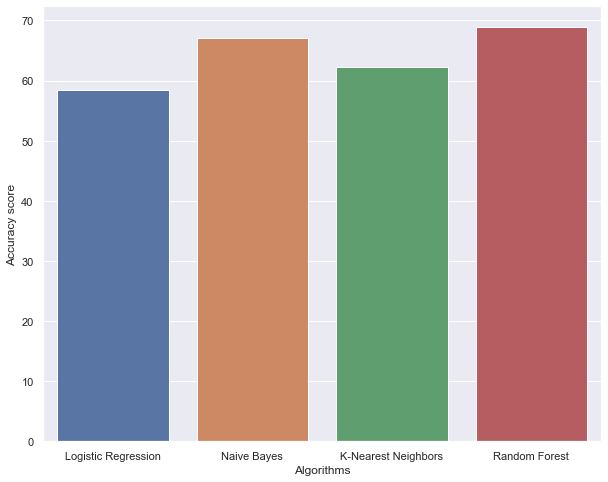

In [59]:
sns.set(rc={'figure.figsize':(10,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)